<a href="https://colab.research.google.com/github/786Tauhid/MOVIE-REVIEW-CLASSIFICATION/blob/master/movie_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING IMORTANT LIBRARY

# IMPORTING REQUIRED LIBRARY

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()
cv=CountVectorizer(max_features=35000)
cv1=CountVectorizer(max_features=20000) # here max_features means i am considering top 35000 features (top features according to frequency)

# New Section

# DATA PREPARATION

In [0]:
df1=pd.read_csv('/content/drive/My Drive/movie rating prediction train.csv')
df2=pd.read_csv('/content/drive/My Drive/Test.csv')

In [4]:
df1.head(n=5)

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [5]:
df2.head(n=5)

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [0]:
df1['label']=le.fit_transform(df1['label']) # changing label value from text to numeric value it leads to 1 for +ve 0 for -ve

In [7]:
df1.head(n=10)

,review,label
0,mature intelligent and highly charged melodram...,1
1,http://video.google.com/videoplay?docid=211772...,1
2,Title: Opera (1987) Director: Dario Argento Ca...,1
3,I think a lot of people just wrote this off as...,1
4,This is a story of two dogs and a cat looking ...,1
5,Steve Carell comes into his own in his first s...,1
6,I'm only going to write more because it's requ...,0
7,"OK, it was a ""risky"" move to rent this flick, ...",0
8,"Cannibalism, a pair of cinematic references to...",1
9,This is one of the great modern kung fu films....,1


- used count vectrozier to convert text type data into numeric
- we get all features in numeric type

In [0]:
train_x=cv.fit_transform(df1['review']).toarray() # it return a sparse matrix of size((size of example,max_features))

train_x1=cv1.fit_transform(df1['review']).toarray()

In [9]:
train_x.shape

(40000, 35000)

In [0]:

test_x=cv.transform(df2['review']).toarray()
test_x1=cv1.transform(df2['review']).toarray()

In [11]:
train_x.dtype

dtype('int64')

In [12]:
test_x.shape

(10000, 35000)

In [13]:
test_x.dtype

dtype('int64')

In [14]:
print(train_x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
print(test_x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
cv.vocabulary_   #vocablury created for given data by count vectorizer it consists of top 35k word which occur frequently

{'mature': 19415,
 'intelligent': 16104,
 'and': 1449,
 'highly': 14595,
 'charged': 5329,
 'melodrama': 19680,
 'filmed': 11673,
 'in': 15568,
 'china': 5558,
 '1948': 142,
 'wei': 34041,
 'stunning': 30060,
 'performance': 22941,
 'as': 1976,
 'the': 31240,
 'love': 18579,
 'triangle': 32056,
 'is': 16413,
 'simply': 28322,
 'if': 15319,
 'you': 34818,
 'have': 14202,
 'to': 31589,
 'see': 27477,
 'this': 31333,
 'magnificent': 18887,
 'film': 11670,
 'take': 30775,
 'it': 16454,
 'http': 15037,
 'video': 33436,
 'google': 13255,
 'com': 6205,
 'en': 10302,
 'distribution': 9059,
 'was': 33879,
 'tried': 32078,
 'br': 3974,
 'we': 33971,
 'opted': 21946,
 'for': 12099,
 'mass': 19317,
 'appeal': 1709,
 'want': 33814,
 'best': 3198,
 'possible': 23787,
 'viewing': 33461,
 'range': 24979,
 'so': 28853,
 'forgo': 12165,
 'profit': 24248,
 'continue': 6799,
 'our': 22090,
 'manual': 19123,
 'labor': 17531,
 'jobs': 16761,
 'gladly': 13056,
 'entertain': 10496,
 'working': 34538,
 'yours'

In [0]:
train_y=df1['label'].values

In [18]:
train_y.shape

(40000,)

In [0]:
train_y=train_y.reshape((-1,1))

In [20]:
train_y.shape

(40000, 1)

In [21]:
print(train_y)

[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


# DEFINE MODEL ARCHITECTURE
# USED DIFFERENET TYPE OF MODEL TO PREDICT SENTIMENTS

# 1.NEURAL NETWORK
- use fully connected or dense layer using relu as activation function
-  hidden layers with 16 unit each
-  output layer with 1 unit (sigmoid as activation function)

In [22]:
from keras import models
from keras.layers import Dense

Using TensorFlow backend.


## DEFINE MODEL

In [0]:
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(35000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

## COMPILE MODEL

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                560016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 560,305
Trainable params: 560,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_val=train_x[:5000]
x_train_new=train_x[5000:]
y_val=train_y[:5000]
y_train_new=train_y[5000:]

In [27]:
hist=model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 35000 samples, validate on 5000 samples
Epoch 1/4
35000/35000 [==============================] - 6s 158us/step - loss: 0.4380 - accuracy: 0.8199 - val_loss: 0.3732 - val_accuracy: 0.8606
Epoch 2/4
35000/35000 [==============================] - 5s 149us/step - loss: 0.2448 - accuracy: 0.9161 - val_loss: 0.2636 - val_accuracy: 0.9008
Epoch 3/4
35000/35000 [==============================] - 5s 148us/step - loss: 0.1782 - accuracy: 0.9386 - val_loss: 0.3869 - val_accuracy: 0.8668
Epoch 4/4
35000/35000 [==============================] - 5s 148us/step - loss: 0.1410 - accuracy: 0.9520 - val_loss: 0.2772 - val_accuracy: 0.9008


In [0]:
h=hist.history

In [29]:
h

{'accuracy': [0.81988573, 0.91605717, 0.93862855, 0.9520286],
 'loss': [0.43795001331738065,
  0.24482258322238923,
  0.1782455594096865,
  0.14101426272051676],
 'val_accuracy': [0.8605999946594238,
  0.9007999897003174,
  0.8668000102043152,
  0.9007999897003174],
 'val_loss': [0.3731994332790375,
  0.2635513277292252,
  0.38690701298713687,
  0.2771763807296753]}

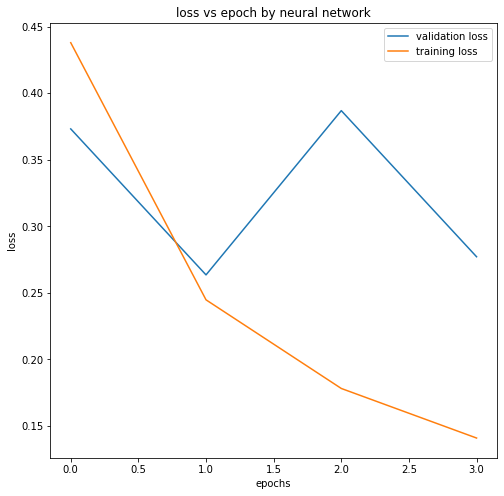

In [30]:
plt.figure(figsize=[8,8])
plt.plot(h['val_loss'],label='validation loss')
plt.plot(h['loss'],label='training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epoch by neural network')
plt.legend()
plt.show()

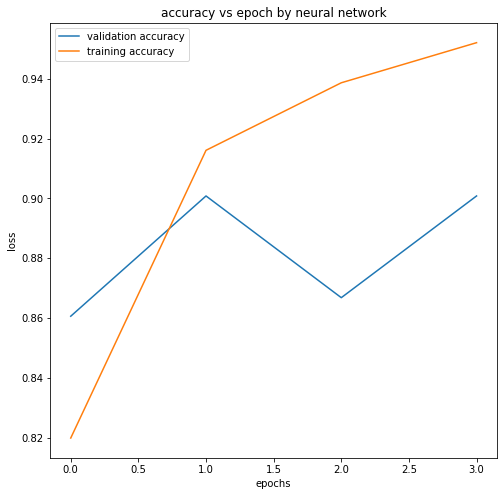

In [31]:
plt.figure(figsize=[8,8])
plt.plot(h['val_accuracy'],label='validation accuracy')
plt.plot(h['accuracy'],label='training accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('accuracy vs epoch by neural network')
plt.legend()
plt.show()

# PREDICTION ON GIVEN TEXT DATA

In [0]:
y_test=model.predict(test_x) 

In [33]:
y_test.shape

(10000, 1)

In [34]:
y_test.dtype

dtype('float32')

In [0]:
x=np.sum(y_test>0.5)

In [36]:
x

5191

In [37]:
type(y_test)

numpy.ndarray

In [0]:
y_test=y_test.astype('str')

In [39]:
y_test

array([['0.100676715'],
       ['0.13581464'],
       ['0.0004733503'],
       ...,
       ['0.9998932'],
       ['0.9852679'],
       ['0.04981491']], dtype='<U32')

# assigning pos for positive sentiment and neg for negetive sentiment

In [0]:

for i in range(y_test.shape[0]):
  if(y_test[i][0]>('0.5')):
    y_test[i][0]='pos'
  else:
    y_test[i][0]='neg'

In [41]:
y_test.shape

(10000, 1)

# convert output data in dataframe type data

In [0]:
dfx=pd.DataFrame(data=y_test,columns=['label'])  

#creating a csv file named as 'y_predicted movie review classification' so that we can download output

In [0]:
dfx.to_csv('y_predicted moview review classification using neural network.csv',index=True)

# 2.USING MULTINOMIAL NAIVE BAYES

# IMPORTING LIBRARY

In [0]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [0]:
mnb=MultinomialNB()

# DIVIDING MY DATA SET FOR TRAINING AND TESTING PURPOSE

In [0]:
x_val_testing=train_x[:5000]
x1_val_testing=train_x1[:5000]
x_val_trainig=train_x[5000:]
x1_val_training=train_x1[5000:]
y_val_testing=train_y[:5000]
y_val_training=train_y[5000:]

In [47]:
mnb.fit(x_val_trainig,y_val_training)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
print(train_x1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
y_predicted=mnb.predict(x_val_testing)

In [0]:
accuracy=((np.sum(y_predicted==1))/float(np.sum(y_val_testing==1))*100)

In [51]:
accuracy

95.51877270892209

# NOW PREDICTING FOR MY TEST DATA

In [0]:
y_test1=mnb.predict(test_x)

In [66]:
y_test1

array([0, 0, 0, ..., 1, 1, 0])

In [54]:
y_test1.shape

(10000,)

In [55]:
y_test1=y_test1.reshape((-1,1))
y_test1.shape

(10000, 1)

In [56]:
y_test.dtype

dtype('<U32')

In [0]:
y_test1=y_test1.astype('str')

In [0]:
for i in range(y_test1.shape[0]):
  if(y_test1[i][0]>('0.5')):
    y_test1[i][0]='pos'
  else:
    y_test1[i][0]='neg'

In [0]:
y_test1.shape

In [0]:
y_test1

In [0]:
dfx1=pd.DataFrame(data=y_test1,columns=['label'])

In [0]:
dfx1.to_csv('y_predicted movie classification using multinomial naive bias.csv',index=True)

# 3.USING MULTIVARIATE BERNAULLI EVENT MODEL

In [0]:
bnb=BernoulliNB()

In [64]:
# training on data
bnb.fit(x1_val_training,y_val_training)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
y_bnb=bnb.predict(test_x1)

In [68]:
y_bnb

array([0, 0, 0, ..., 1, 1, 0])

In [69]:
y_bnb.shape

(10000,)

In [0]:
y_bnb=y_bnb.reshape((-1,1))

In [71]:
y_bnb.shape

(10000, 1)

In [0]:
y_bnb=y_bnb.astype('str')
for i in range(y_bnb.shape[0]):
  if(y_bnb[i][0]>('0.5')):
    y_bnb[i][0]='pos'
  else:
    y_bnb[i][0]='neg'

In [73]:
y_bnb

array([['neg'],
       ['neg'],
       ['neg'],
       ...,
       ['pos'],
       ['pos'],
       ['neg']], dtype='<U21')

In [0]:
dfybnb=pd.DataFrame(data=y_bnb,columns=['label'])

In [0]:
dfybnb.to_csv('y_predicted by multivariate bernuli event model.csv',index=True)